# Sistem de fuziune a deciziilor prin ponderare

In [1]:
from FusionSystem import *
import torch
import torch.optim as optim
import torch.nn as nn
from SegDataset import *
from utils.function_lib import *
from utils.DiceLoss import DiceLoss

In [2]:
training_path = 'G:/MachineLearning/liver-database/validation/'

training_dataset = SegDataset(training_path)
training_dataloader = torch.utils.data.DataLoader(training_dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)

device = torch.device('cuda')
fusion_model = FusionSystem(num_sources=4).to(device)
optimizer = optim.SGD(fusion_model.parameters() ,lr=10, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)
loss_fcn = nn.BCEWithLogitsLoss().to(device)

In [3]:
for epoch in range(2):
    train_loop(training_dataloader, fusion_model, loss_fcn, optimizer, scheduler=None,  device=device)
    loss = test_loop(training_dataloader, fusion_model, loss_fcn, device=device)
    scheduler.step()

loss: 0.596600  [    0/ 4776]
loss: 0.025851  [ 1600/ 4776]
loss: 0.021264  [ 3200/ 4776]
Avg loss: 0.015618 

loss: 0.020643  [    0/ 4776]
loss: 0.015468  [ 1600/ 4776]
loss: 0.003898  [ 3200/ 4776]
Avg loss: 0.008279 



Parameter containing:
tensor([[[[1.5344]],

         [[2.1826]],

         [[4.0234]],

         [[3.8882]]]], device='cuda:0', requires_grad=True)
DenseNet201
Inception
ResNet152
ResNeXt101
torch.Size([512, 512])
tensor(1.)


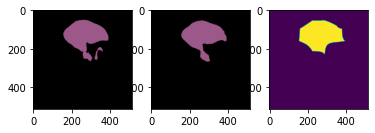

In [4]:
## tensor([-0.5175, -0.3556,  1.7958,  2.1399], device='cuda:0', requires_grad=True)
print(fusion_model.weights.weight)
show_model_seg(fusion_model.cpu(), training_dataset, 584)